# Preprocessing Leaf from Flavia Dataset


In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import mahotas as mt
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
path = "Leaves"
files = os.listdir(path)
for file in os.listdir(path) :
    print(os.path.join(path,file))
    

Leaves\1001.jpg
Leaves\1002.jpg
Leaves\1003.jpg
Leaves\1004.jpg
Leaves\1005.jpg
Leaves\1006.jpg
Leaves\1007.jpg
Leaves\1008.jpg
Leaves\1009.jpg
Leaves\1010.jpg
Leaves\1011.jpg
Leaves\1012.jpg
Leaves\1013.jpg
Leaves\1014.jpg
Leaves\1015.jpg
Leaves\1016.jpg
Leaves\1017.jpg
Leaves\1018.jpg
Leaves\1019.jpg
Leaves\1020.jpg
Leaves\1021.jpg
Leaves\1022.jpg
Leaves\1023.jpg
Leaves\1024.jpg
Leaves\1025.jpg
Leaves\1027.jpg
Leaves\1028.jpg
Leaves\1029.jpg
Leaves\1031.jpg
Leaves\1032.jpg
Leaves\1033.jpg
Leaves\1035.jpg
Leaves\1037.jpg
Leaves\1038.jpg
Leaves\1039.jpg
Leaves\1040.jpg
Leaves\1041.jpg
Leaves\1042.jpg
Leaves\1044.jpg
Leaves\1045.jpg
Leaves\1046.jpg
Leaves\1047.jpg
Leaves\1048.jpg
Leaves\1049.jpg
Leaves\1050.jpg
Leaves\1051.jpg
Leaves\1052.jpg
Leaves\1053.jpg
Leaves\1054.jpg
Leaves\1055.jpg
Leaves\1056.jpg
Leaves\1057.jpg
Leaves\1058.jpg
Leaves\1059.jpg
Leaves\1060.jpg
Leaves\1061.jpg
Leaves\1062.jpg
Leaves\1063.jpg
Leaves\1064.jpg
Leaves\1065.jpg
Leaves\1066.jpg
Leaves\1067.jpg
Leaves\1

In [3]:
def features():
    feature = ['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity',
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b',
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    table = pd.DataFrame([], columns=feature)
    for file in files:
        original_img = cv2.imread(os.path.join(path,file))
        plt.imshow(original_img,cmap='Greys_r')
        plt.show()
        print(os.path.join(path,file))
        #plt.imshow(original_img)
        #cv2.imshow('image1',original_img)
        #cv2.waitKey(0)
        #print(type(original_img))
     
        
        img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
        plt.imshow(img,cmap='Greys_r')
        plt.show()
       
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        plt.imshow(gray,cmap='Greys_r')
        plt.show()
        blur = cv2.GaussianBlur(gray, (25,25),0)
        plt.imshow(blur,cmap='Greys_r')
        plt.show()
        
        ret,otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        plt.imshow(otsu,cmap='Greys_r')
        plt.show()
        kernel = np.ones((50,50),np.uint8)
        plt.imshow(kernel,cmap='Greys_r')
        plt.show()
        closing = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, kernel)
        plt.imshow(closing,cmap='Greys_r')
        plt.show()
        
        
        #Texture features
        texture = mt.features.haralick(gray)
        ht_mean = texture.mean(axis=0)
        contrast = ht_mean[1]
        correlation = ht_mean[2]
        inverse_diff_moments = ht_mean[4]
        entropy = ht_mean[8]
        
        
        
        #Shape features
        image, contours,hierarchy= cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)       
        cv2.drawContours(image,contours,-1,(0,255,0),3)
        plt.imshow(image,cmap='Greys_r')
        plt.show()
        cnt = contours[0]
        M = cv2.moments(cnt)
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt,True)
        x,y,w,h = cv2.boundingRect(cnt)
        aspect_ratio = float(w)/h
        rectangularity = w*h/area
        circularity = ((perimeter)**2)/area
        
        #Color features
        red_channel = img[:,:,0]
        green_channel = img[:,:,1]
        blue_channel = img[:,:,2]
        blue_channel[blue_channel == 255] = 0
        green_channel[green_channel == 255] = 0
        red_channel[red_channel == 255] = 0
        
        red_mean = np.mean(red_channel)
        green_mean = np.mean(green_channel)
        blue_mean = np.mean(blue_channel)
        
        red_std = np.std(red_channel)
        green_std = np.std(green_channel)
        blue_std = np.std(blue_channel)
        
        vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,
                  red_mean,green_mean,blue_mean,red_std,green_std,blue_std,
                  contrast,correlation,inverse_diff_moments,entropy
                 ]
        
        tmp_table = pd.DataFrame([vector],columns=feature)
        table = table.append(tmp_table)
        
    
    return table

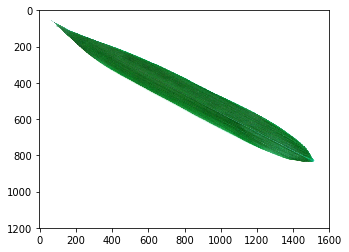

Leaves\1001.jpg


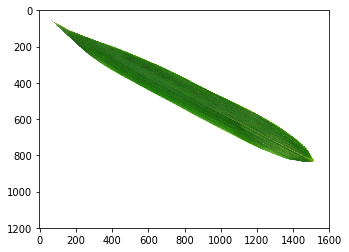

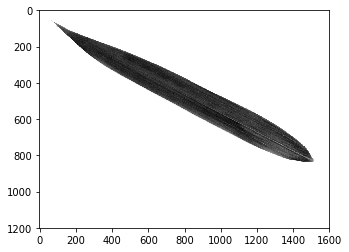

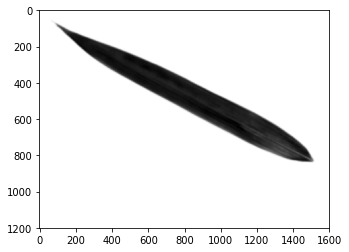

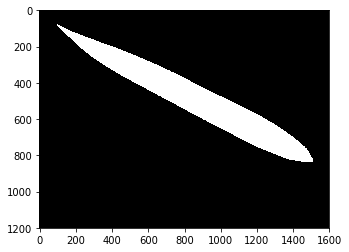

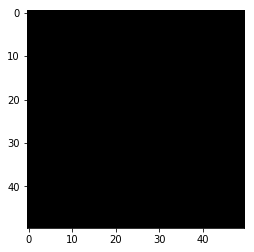

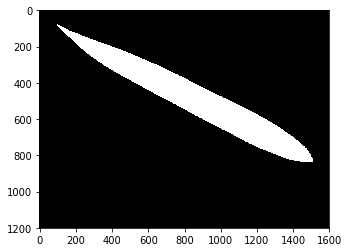

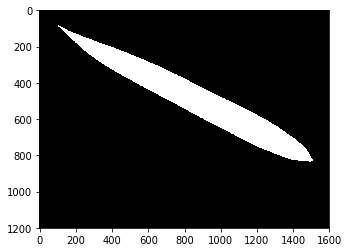

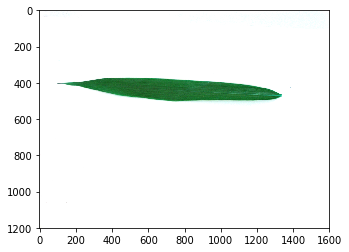

Leaves\1002.jpg


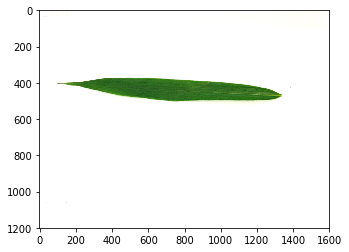

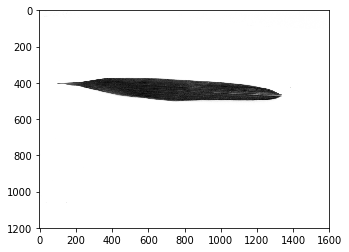

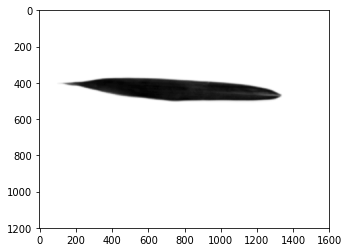

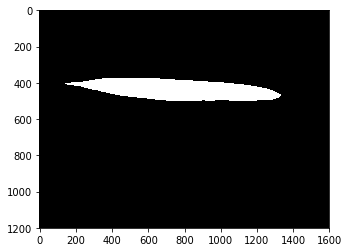

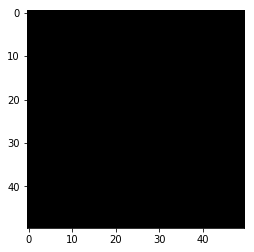

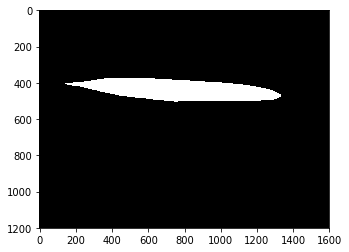

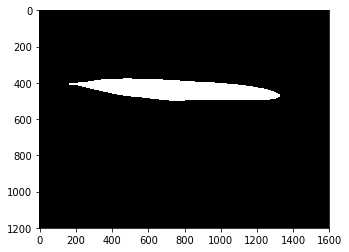

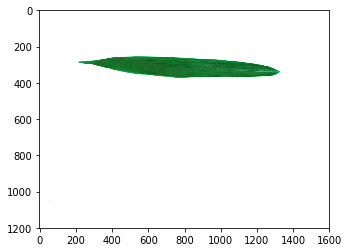

Leaves\1003.jpg


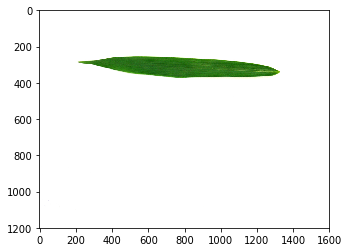

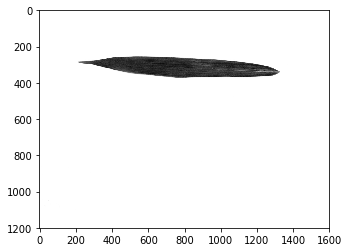

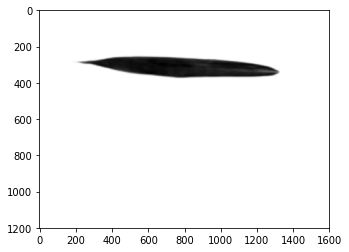

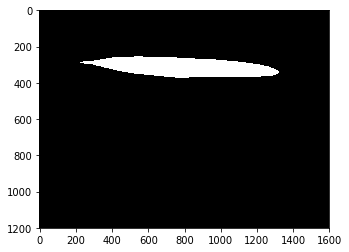

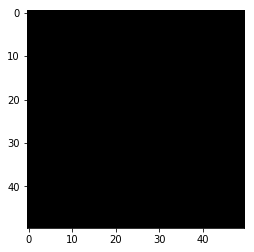

KeyboardInterrupt: 

In [5]:
data=features()
data.shape
data.to_csv("Leav.csv")